<a href="https://colab.research.google.com/github/pepperamy/tenK_phase2/blob/main/sentence_diff_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence

In [2]:
import pandas as pd 
import numpy as np

In [4]:
text_tb = pd.read_csv('quora_duplicate_question_1000(1).csv',encoding='windows-1252')

In [5]:
text_tb.head()

,q1,q2,is_duplicate
0,A title for my continuation to The Gift of the...,How do I start my continuation for the Gift of...,0
1,According to the International Federation of R...,What type of belt can be used to lift 200 Kg c...,0
2,Are Canada Geese really Canadian?,What do Canadians call Canada?,0
3,Are exocytosis and endocytosis examples of act...,What are examples of passive transport in cells?,0
4,Are government employees eligible to Sukanya S...,Can a Government employee apply IEC?,0


In [ ]:
#text_tb = text_tb.iloc[:,1:]

In [ ]:
text_tb.head()

In [7]:
text_tb.tail()

,q1,q2,is_duplicate
995,Will there really be any war between India and...,Will there be a nuclear war between India and ...,1
996,Will Thursday Night Football increase ratings ...,Why is The Big Bang Theory (TV series) so popu...,0
997,Would a woman in the Catholic Church be shunne...,What would happen if a woman sued the Catholic...,0
998,Would you switch from Canon 6D to Leica D-LUX ...,What tripod should I get for my Canon 6D?,0
999,You have given all statement as correct in UNC...,Have you ever been told any condescending stat...,0


In [19]:
import re
import string

In [48]:
def split_word(sent):
  tokens = sent.split(' ')

  cleaned_tokens = []
  
  
  for token in tokens:
      # remove space around each token
      token = token.strip("")
      
      # recursively remove punctuations around a token
      while len(token)>0:  
          
          # remove leading punctuation
          if token[0] in string.punctuation:
              token = token[1:]
   
          # remove trailing punctuation
          if (len(token)>0) and (token[-1] in string.punctuation):
              token = token[0:len(token)-1]
          
          # break if no leading or trailing punctuation
          if (len(token)>0) and not (token[0] in string.punctuation or token[-1] in string.punctuation):
              break
      
      # add non-empty token in lower case
      if len(token)>0:
          cleaned_tokens.append(token.lower())

  return cleaned_tokens

In [45]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
split_word('hello, how are you? . why-66')

['hello', 'how', 'are', 'you', 'why-66']

In [50]:
text_tb['num_q1'] = text_tb.q1.apply(lambda x: len(split_word(x)))

In [51]:
text_tb['num_q2'] = text_tb.q1.apply(lambda x: len(split_word(x)))

In [52]:
num_list = pd.DataFrame(list(text_tb.num_q1) + list(text_tb.num_q2),columns=['num'])

In [53]:
num_list

,num
0,11
1,13
2,5
3,10
4,8
...,...
1995,19
1996,17
1997,19
1998,10


In [54]:
tb = num_list.num.value_counts().to_frame().reset_index().sort_values(by=['index']).rename(columns={'index':'num','num':'cnt'})
#.reset_index()
tb['percent']=tb['cnt']/len(num_list)
tb['cumsum_']=tb['percent'].cumsum()
# print(tb.shape)

In [55]:
tb[tb.cumsum_<=0.70].tail()

,num,cnt,percent,cumsum_
1,7,246,0.123,0.285
2,8,228,0.114,0.399
0,9,262,0.131,0.530
3,10,194,0.097,0.627
5,11,144,0.072,0.699


In [57]:
text = list(text_tb.q1) + list(text_tb.q2)

In [58]:
len(text)

2000

In [59]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
word_index = tokenizer.word_index

In [60]:
len(word_index)

3990

In [61]:
w2v = pd.read_csv('glove.6B.50d.txt', sep=" ", quoting=3, header=None, index_col=0)

In [62]:
glove = {key: val.values for key, val in w2v.T.items()}

In [ ]:
glove

In [64]:
def generate_seq(docs, DOC_NUM, MAX_LEN, MAX_WORDS, word_index):
  sequences = np.zeros((DOC_NUM, MAX_LEN))
  print(sequences.shape)
  for i, doc in enumerate(docs):
    wordTokens = text_to_word_sequence(doc)
    #print(wordTokens)
    for j, word in enumerate(wordTokens):
      #print(word)
      if j < MAX_LEN and word_index[word]< MAX_WORDS:
        sequences[i,j] = word_index[word] 
  return sequences

In [81]:
DOC_NUM = len(text)
MAX_LEN = 12
MAX_WORDS = 3000
EMBEDDING_DIM = 50

In [87]:
sequences_1 = generate_seq(text_tb.q1, len(text_tb.q1), MAX_LEN, MAX_WORDS, word_index)

(1000, 12)


In [88]:
sequences_2 = generate_seq(text_tb.q2, len(text_tb.q2), MAX_LEN, MAX_WORDS, word_index)

(1000, 12)


In [ ]:
# def get_input(sequences,win_size):
#   input_data_1 = np.array([[np.NaN]*win_size])
#   input_data_2 = np.array([[np.NaN]*win_size])
#   sent_1 = sequences[0]
#   sent_2 = sequences[1]
#   for idx in np.arange(0,len(sent_1)):
#     if idx <= len(sent_1)-win_size:
#       temp_1 = np.array(sent_1[idx:idx+win_size]).reshape(1,win_size)
#       temp_2 = np.array(sent_2[idx:idx+win_size]).reshape(1,win_size)
#       # print(temp_1)
#       # print(input_data_1)
#       input_data_1 = np.concatenate((input_data_1, temp_1))
#       input_data_2 = np.concatenate((input_data_2, temp_2))
#   input_data_1 = input_data_1[~np.isnan(input_data_1).any(axis=1)]
#   input_data_2 = input_data_2[~np.isnan(input_data_2).any(axis=1)]
#   return input_data_1, input_data_2

In [ ]:
# input_data_1, input_data_2 = get_input(sequences,5)

In [ ]:
# input_data_1

In [ ]:
# input_data_2.shape

In [ ]:
# type(input_data_2[0][0])

In [69]:
def generate_embedding(EMBEDDING_DIM, MAX_WORDS, word_index, w2v_model):
  embedding_matrix = np.zeros(((MAX_WORDS + 1), EMBEDDING_DIM))
  ignored=[]
  cnt=0
  for word, i in word_index.items():
    if (word in w2v_model.keys()) & (i <= MAX_WORDS):
        #print(word)
        embedding_vector = w2v_model[word]
        cnt+=1
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    else: 
      ignored.append(word)
      #print(word)
  print(cnt)
  print(ignored[0:10])
  print(len(ignored))
  return embedding_matrix

In [70]:
embedding = generate_embedding(EMBEDDING_DIM, MAX_WORDS, word_index, glove)

2867
["what's", "don't", "i'm", "can't", "you've", "doesn't", "it's", "haven't", "assassin's", 'angularjs']
1123


In [71]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers

from keras import optimizers

from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, MaxPooling2D, Dropout, Activation, Input, Flatten, Concatenate, Reshape,\
              Conv2D, GlobalAveragePooling1D, LSTM, GRU, Bidirectional, dot, multiply, Lambda, TimeDistributed, Masking, Subtract,\
              Lambda, Multiply

from keras.models import Model, Sequential
from keras.regularizers import l2,l1,l1_l2
from keras.callbacks import Callback,EarlyStopping, ModelCheckpoint
from sklearn.utils import class_weight
from keras.initializers import Constant
from keras import metrics

from keras.callbacks import Callback

from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve, classification_report,accuracy_score, auc, roc_curve, roc_auc_score, average_precision_score

In [77]:
def match_model(MAX_WORDS, MAX_LEN, EMBEDDING_DIM, F):

  global embedding
  embedding_layer = Embedding( MAX_WORDS+1,EMBEDDING_DIM,embeddings_initializer = Constant(embedding),
                  mask_zero=True,input_length=MAX_LEN,trainable=False) 
  
  input_1 = Input(shape=(MAX_LEN,), dtype='float32')
  input_2 = Input(shape=(MAX_LEN,), dtype='float32')

  embedded_sequences_1 = embedding_layer(input_1)
  embedded_sequences_2 = embedding_layer(input_2)

  #build gate 
  vect_1 = Conv1D(filters=36, kernel_size=3, padding='same',name='transfer_1')(embedded_sequences_1)
  vect_2 = Conv1D(filters=36, kernel_size=3, padding='same',name='transfer_2')(embedded_sequences_2)
  embedded_distance = Subtract(name='subtract_embeddings')([vect_1, vect_2])
  embedded_distance = Lambda(lambda x: K.sum(K.abs(x), axis=-1, keepdims=True), 
        name='euclidean_distance')(embedded_distance)
  #build 1dcnn
  input_all = Concatenate(axis = -1)([embedded_sequences_1, embedded_sequences_2])
  layer1_conv=Conv1D(filters=F, kernel_size=3, padding='same', name='1d_cnn')(input_all)
  layer1_activation=Activation('relu')(layer1_conv)
  multiply_layer = Multiply()([layer1_activation,embedded_distance])
  input_reshape = Reshape((MAX_LEN, MAX_LEN, -1))(multiply_layer)
  z = MaxPooling2D(pool_size=(2, 2))(input_reshape)

  num_conv2d_layers = 2
  for i in range(num_conv2d_layers):
    z=Conv2D(filters=10, kernel_size=(3,3), padding='same')(z)
    z=Activation('relu')(z)
    z=MaxPooling2D(pool_size=(2, 2))(z)

  x = Flatten()(z)
  x = Dense(1024,activation='relu')(x)
  x = BatchNormalization()(x)      
  x = Dense(256,activation='relu')(x)
  x = BatchNormalization()(x)          
  x = Dense(64,activation='relu')(x)
  x = Dropout(0.5)(x)        
  preds = Dense(1, activation='sigmoid', name='output')(x)
  model = Model(inputs=[input_1, input_2], outputs=preds)
  model._name = "model_basic"
  model.summary()  
  return model
  

Model: "model_basic"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 12)]         0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 12)]         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 12, 50)       150050      input_13[0][0]                   
                                                                 input_14[0][0]                   
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 12, 100)      0           embedding_6[0][0]      

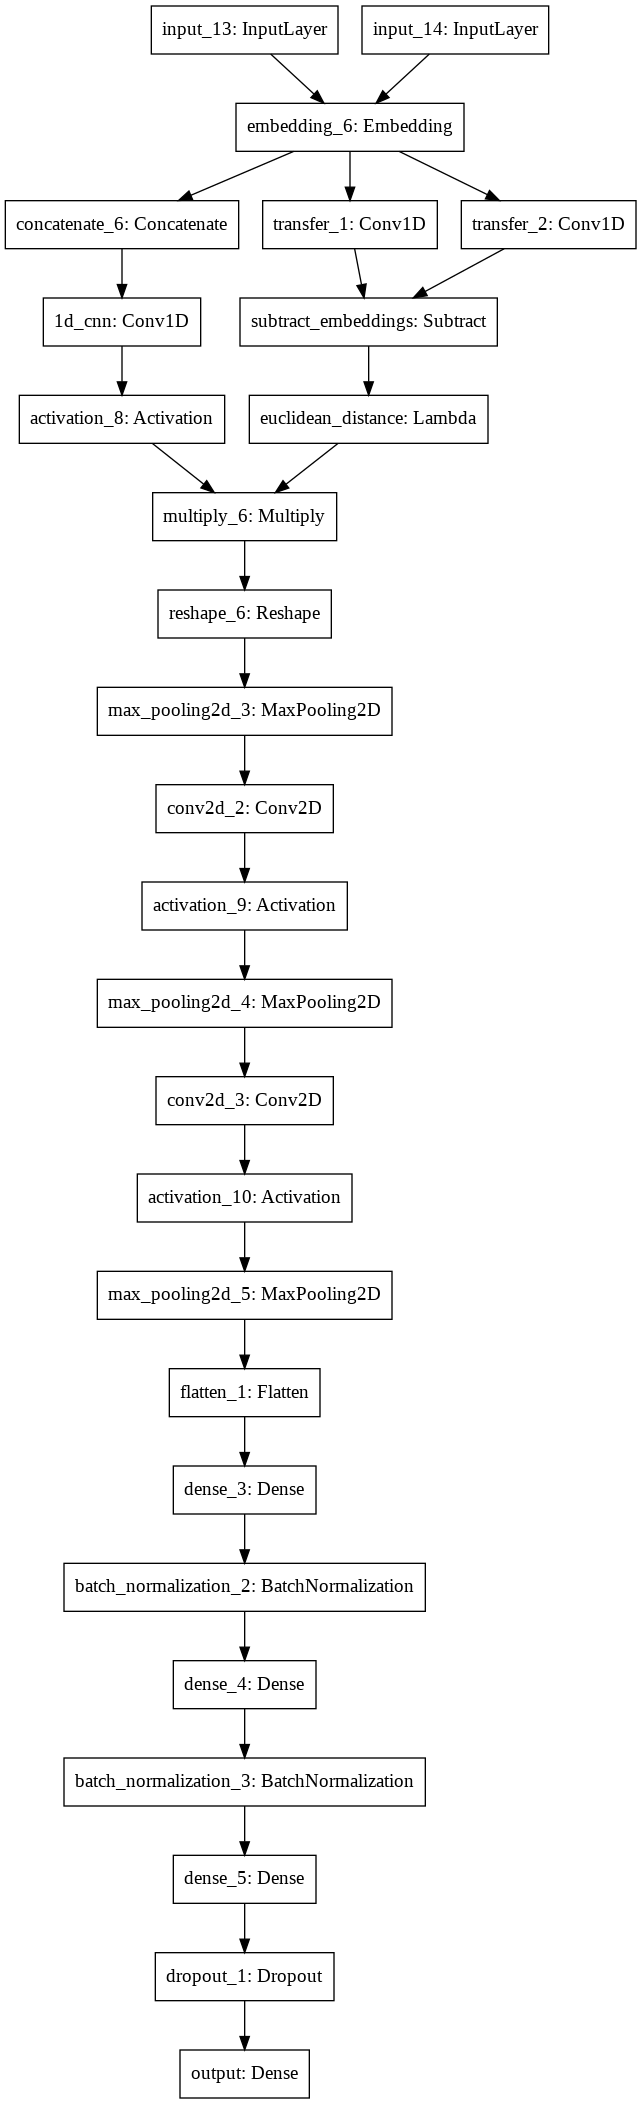

In [84]:
model_1 = match_model(MAX_WORDS, MAX_LEN, EMBEDDING_DIM, 24)


from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.utils.vis_utils import plot_model

SVG(model_to_dot(model_1, dpi=65).create(prog='dot', format='svg'))
plot_model(model_1, to_file='model.png')

In [85]:
from sklearn.model_selection import train_test_split

In [89]:
train_x_1, test_x_1, train_x_2, test_x_2, train_y, test_y = train_test_split(sequences_1, sequences_2, text_tb.is_duplicate,\
                                          test_size=0.33, shuffle=True)

In [91]:
opt = optimizers.RMSprop(lr=0.01)
model_1.compile(optimizer= opt,
          loss= 'binary_crossentropy', #'mean_squared_error',
          metrics=['accuracy',metrics.AUC(name='my_auc')])
earlyStopping = EarlyStopping(monitor='val_loss',patience = 5, 
                  verbose =1, mode ='min')
checkPoint = ModelCheckpoint('best_model_1', monitor='val_loss', verbose=2, save_best_only=True, mode='min')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [92]:
hist = model_1.fit([train_x_1,train_x_2], train_y, validation_data=([test_x_1,test_x_2], test_y),\
       callbacks = [earlyStopping, checkPoint], batch_size=32, epochs=100, verbose=1)

Epoch 1/100
21/21 [==============================] - 25s 72ms/step - loss: 1.7953 - accuracy: 0.5424 - my_auc: 0.5351 - val_loss: 18.3189 - val_accuracy: 0.6091 - val_my_auc: 0.5053
Epoch 2/100
21/21 [==============================] - 0s 17ms/step - loss: 0.9261 - accuracy: 0.6067 - my_auc: 0.5325 - val_loss: 1.0351 - val_accuracy: 0.6030 - val_my_auc: 0.4579
Epoch 3/100
21/21 [==============================] - 0s 17ms/step - loss: 0.7162 - accuracy: 0.5965 - my_auc: 0.5959 - val_loss: 1.0906 - val_accuracy: 0.6091 - val_my_auc: 0.4330
Epoch 4/100
21/21 [==============================] - 0s 16ms/step - loss: 0.6855 - accuracy: 0.6056 - my_auc: 0.6003 - val_loss: 0.7280 - val_accuracy: 0.5909 - val_my_auc: 0.4858
Epoch 5/100
21/21 [==============================] - 0s 18ms/step - loss: 0.6981 - accuracy: 0.5961 - my_auc: 0.5738 - val_loss: 0.7063 - val_accuracy: 0.6152 - val_my_auc: 0.5502
Epoch 6/100
21/21 [==============================] - 0s 16ms/step - loss: 0.6948 - accuracy: 0.623

In [108]:
q1_input = Input(shape=(MAX_LEN,), dtype='int32', name='q1_input')
q2_input = Input(shape=(MAX_LEN,), dtype='int32', name='q2_input')

def cnn_model(main_input):

    #if PRETRAINED_WORD_VECTOR is not None:
    embed_1 =  Embedding( MAX_WORDS+1,EMBEDDING_DIM,embeddings_initializer = Constant(embedding),
                  mask_zero=True,input_length=MAX_LEN,trainable=False)(main_input)# 需要理清楚大小
    #else:
        #embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, output_dim=EMBEDDING_DIM, input_length=MAX_DOC_LEN, name='embedding')(main_input)

    # Convolution-pooling-flat block
    conv_blocks = []
    for f in [2,3,4]: # For every filter 
        conv = Conv1D(filters=36, kernel_size=f, activation='relu')(embed_1) # convolution  # filter-kernal extracting 64 features with ReLU activation function
        conv = MaxPooling1D(MAX_LEN-f+1)(conv) # maxpooling
        conv = Flatten()(conv) # flatten filters extracting features (size*number = 3*64)
        conv_blocks.append(conv) 

    if len(conv_blocks)>1:
        z=Concatenate(name='concate')(conv_blocks)
    else:
        z=conv_blocks[0]
    model = Model(inputs=main_input, outputs=z) # should have different name

    return model    # 以上把feature提取了出来, 并且连接起来. 接下里, 需要对相同的model, 不同的输入, 同时提取, 并且计算距离, 根据label, 告诉他距离的权重. 


# Add Lambda Layer

q1_vector = cnn_model(q1_input)(q1_input)  # The first "q1_input" is the shape of input
q2_vector = cnn_model(q2_input)(q2_input)  # The second "q1_input" is the direction of this Network
Dist = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))([q1_vector, q2_vector]) 
preds = Dense(1,activation='sigmoid', name='output')(Dist)   # 这里没有保证0和1.
siamese_net  = Model(inputs=[q1_input,q2_input], outputs=preds) # The input and output of Siamese_net


In [109]:
opt = optimizers.RMSprop(lr=0.01)
siamese_net.compile(optimizer= opt,
          loss= 'binary_crossentropy', #'mean_squared_error',
          metrics=['accuracy',metrics.AUC(name='my_auc')])
earlyStopping = EarlyStopping(monitor='val_loss',patience = 5, 
                  verbose =1, mode ='min')
checkPoint = ModelCheckpoint('best_model_1', monitor='val_loss', verbose=2, save_best_only=True, mode='min')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [110]:
hist = model_1.fit([train_x_1,train_x_2], train_y, validation_data=([test_x_1,test_x_2], test_y),\
       callbacks = [earlyStopping, checkPoint], batch_size=32, epochs=100, verbose=1)

Epoch 1/100
21/21 [==============================] - 0s 17ms/step - loss: 0.3799 - accuracy: 0.8418 - my_auc: 0.9135 - val_loss: 2.0803 - val_accuracy: 0.4818 - val_my_auc: 0.5694

Epoch 00001: val_loss improved from inf to 2.08034, saving model to best_model_1


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: best_model_1/assets
Epoch 2/100
21/21 [==============================] - 0s 17ms/step - loss: 0.3141 - accuracy: 0.8597 - my_auc: 0.9375 - val_loss: 1.7945 - val_accuracy: 0.5545 - val_my_auc: 0.6037

Epoch 00002: val_loss improved from 2.08034 to 1.79451, saving model to best_model_1


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: best_model_1/assets
Epoch 3/100
21/21 [==============================] - 0s 18ms/step - loss: 0.2444 - accuracy: 0.9090 - my_auc: 0.9634 - val_loss: 5.3611 - val_accuracy: 0.5000 - val_my_auc: 0.5815

Epoch 00003: val_loss did not improve from 1.79451
Epoch 4/100
21/21 [==============================] - 0s 16ms/step - loss: 0.2157 - accuracy: 0.9254 - my_auc: 0.9714 - val_loss: 7.2274 - val_accuracy: 0.5152 - val_my_auc: 0.5824

Epoch 00004: val_loss did not improve from 1.79451
Epoch 5/100
21/21 [==============================] - 0s 18ms/step - loss: 0.2306 - accuracy: 0.9254 - my_auc: 0.9685 - val_loss: 5.2616 - val_accuracy: 0.5000 - val_my_auc: 0.5744

Epoch 00005: val_loss did not improve from 1.79451
Epoch 6/100
21/21 [==============================] - 0s 17ms/step - loss: 0.1509 - accuracy: 0.9507 - my_auc: 0.9845 - val_loss: 9.9810 - val_accuracy: 0.4485 - val_my_auc: 0.5485

Epoch 00006: val_loss did not improve from 1.79451
Epoch 7/100
21/21